<h1 align = "center">HW 5 Project</h1>

<h2>A Project by-</h2><br>Shobhit Lamba<br>UIN: 655612480

<h2> Problem statement:</h2>

I have chosen to do option 1, which goes as follows-<br>Option 1: You	are working	for	a	non-profit	that	is	recruiting student	volunteers	to help	with	Alzheimer’s	
patients. You	have	been	tasked	with	predicting how	suitable	a	person	is	for	this	task	by	predicting	how	
empathetic	he	or	she	is.	Using	the	Young	People	Survey dataset
(https://www.kaggle.com/miroslavsabo/young-people-survey/),	predict	a	person’s	“empathy” on	a	scale	
from	1	to	5.	You	can	use	any	of	the	other	attributes	in	the	dataset	to	make	this	prediction.

<h2> Importing the required libraries</h2><br>
All the required functions are imported here.

In [1]:
# Importing the libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings(action='ignore', category=DeprecationWarning) # To ignore a DeprecatedWarning caused by VotingClassifier

<h2>Part 1: Data Preprocessing</h2><br>I decided to not do much preprocessing for the data here. I tried doing feature scaling, label and one-hot encoding the columns with categorical values but they did not show enough progress for me to give more time to them.

In [2]:
# Reading the csv file using pandas
data = pd.read_csv("responses.csv")
# Removing the rows that do not have any value for 'Empathy' column
data = data[np.isfinite(data['Empathy'])]
# Filling the missing values in the csv file with the mean of the column
data = data.fillna(data.mean())
# Removing the columns that do not have numerical values
data = data.select_dtypes(exclude = [object])
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0


<b>Separating X and y:</b>

In [3]:
y = data['Empathy'].values
X = data.drop('Empathy', axis = 1)

<h2>Part 2: Learning</h2>

We first split the data into train/dev/test:

In [4]:
# Using feature selectors to find the best possible features
# relevant to out learning purpose. For now, let's assume 10 features gives
# the best results. We will automate the process later and find
# the optimal value for it later on when we apply our final model.
X_new = SelectKBest(chi2, k = 10).fit_transform(X, y)

# Splitting the data into train, dev and test datasets
# approximately in the ratio of 60:20:20
X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.2, 
                                                  random_state=1)

<b> Running a baseline classifier on the training data and validating it with dev set. The models being used are:<br>1. GausianNB<br>2. MultinomialNB<br>3. K-Nearest Neighbors<br>4. Decision trees<br>5. Multi Layer Perceptron</b>

In [5]:
# Using Gaussian Naive Bayes
classifier = GaussianNB()
classifier = classifier.fit(X_train, y_train)
predictions1 = classifier.predict(X_val)
accuracy_score(y_val, predictions1)
# ~39% accuracy

0.39751552795031053

In [6]:
# Using Multinomial Naive Bayes
classifier = MultinomialNB()
classifier = classifier.fit(X_train, y_train)
predictions2 = classifier.predict(X_val)
accuracy_score(y_val, predictions2)
# ~37% accuracy

0.37267080745341613

In [7]:
# Using K-Nearest Neighbors
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier = classifier.fit(X_train, y_train)
predictions3 = classifier.predict(X_val)
accuracy_score(y_val, predictions3)
# ~40% accuracy

0.40372670807453415

In [8]:
# Using Decision Trees
classifier = tree.DecisionTreeClassifier(criterion='entropy', 
                                         splitter='best',
                                         max_depth=2, min_samples_split=2, 
                                         min_samples_leaf=1, 
                                         min_weight_fraction_leaf=0.0, 
                                         max_features=None, 
                                         random_state=None, 
                                         max_leaf_nodes=None, 
                                         min_impurity_decrease=0.0, 
                                         min_impurity_split=None)
classifier = classifier.fit(X_train, y_train)
predictions4 = classifier.predict(X_val)
accuracy_score(y_val, predictions4)    
# ~42% accuracy

0.422360248447205

In [9]:
# Using Multi Layer Perceptron
classifier = MLPClassifier(solver = 'lbfgs', alpha = 1e-5,
                         hidden_layer_sizes = (5, 5), random_state = 1)
classifier = classifier.fit(X_train, y_train)
predictions5 = classifier.predict(X_val)
accuracy_score(y_val, predictions5)    
# ~39% accuracy

0.391304347826087

There are 5 categories for classification in "Empathy", and a randomized function would at best give 20% accuracy. It can be assumed that the baseline classifiers are performing fairly well.

<h2>My Model:</h2><br>For my model, I trained 4 more models in addition to the ones mentioned above. These are SVM, Random Forest, AdaBoost and Logistic Regression and did applied Bagging to all except AdaBoost and Random Forest classifiers. Finally I stacked them up with a Voting classification ensemble using Hard Vote ensemble.

In [10]:
# Multinomial Naive Bayes
clf1 = MultinomialNB()
clf1 = clf1.fit(X_train, y_train)
clf1 = BaggingClassifier(clf1)
    
# Multi-layer Perceptron
clf2 = MLPClassifier(solver = 'lbfgs', alpha = 1e-2,
                     hidden_layer_sizes = (25, 20), random_state = 1)
clf2 = clf2.fit(X_train, y_train) 
clf2 = BaggingClassifier(clf2)
   
# SVC
clf3 = SVC(C = 1.5)
clf3 = clf3.fit(X_train, y_train)
clf3 = BaggingClassifier(clf3)
   
# Decision tree
clf4 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best',
                                   max_depth=2, min_samples_split=2, 
                                   min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_features=None, random_state=None, max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, min_impurity_split=None)
clf4 = clf4.fit(X_train, y_train)
clf4 = BaggingClassifier(clf4)
   
# Random Forest
clf5 = RandomForestClassifier(max_depth = 5, random_state = 0)
clf5 = clf5.fit(X_train, y_train)   
  
# KNN
clf6 = KNeighborsClassifier(n_neighbors = 3)
clf6 = clf6.fit(X_train, y_train)
clf6 = BaggingClassifier(clf6)
    
# Gaussian Naive Bayes
clf7 = GaussianNB()
clf7 = clf7.fit(X_train, y_train)
clf7 = BaggingClassifier(clf7)
    
# AdaBoost Classifier
clf8 = AdaBoostClassifier(n_estimators = 100)
clf8 = clf8.fit(X_train, y_train)
  
# Logistic Regression
clf9 = LogisticRegression(random_state=1)
clf9 = clf9.fit(X_train, y_train)
clf9 = BaggingClassifier(clf9)
   
# Soft Vote ensemble
clf = VotingClassifier(estimators = [('mnb', clf1), ('mlp', clf2), ('svc', clf3), 
                                     ('dt', clf4), ('rf', clf5), ('knn', clf6), 
                                     ('gnb', clf7), ('ab', clf8), ('lr', clf9)], voting = 'hard')
clf = clf.fit(X_train, y_train)
ensembled_accuracy = clf.predict(X_val)  
accuracy_score(y_val, ensembled_accuracy)    
# 43-45% accuracy

0.43478260869565216

And for test data,

In [11]:
clf = clf.fit(X_train, y_train)
ensembled_accuracy = clf.predict(X_test)  
accuracy_score(y_test, ensembled_accuracy)
# ~43% accuracy with 5-fold cross-validation

0.44776119402985076

We can see that ensembling all those methods gave us a stable and better performance than just using a single model.

<h2>Tuning the number of features selected</h2><br>Now we need to find out the optimal number of features needed to be used in training to get the best results. <br><br>For this, we'll need to convert our ensemble model into a function and loop over it with a different value of k in feature_selection and finding out a k which gives the highest accuracy. This k will be used for the final training and to make predictions on the test dataset.

In [12]:
# Function that runs my model and returns the accuracy after validation
def ensemble(X_train, X_test, y_train, y_test):
    # Multinomial Naive Bayes
    clf1 = MultinomialNB()
    clf1 = clf1.fit(X_train, y_train)
    clf1 = BaggingClassifier(clf1)
    
    # Multi-layer Perceptron
    clf2 = MLPClassifier(solver = 'lbfgs', alpha = 1e-2,
                         hidden_layer_sizes = (25, 20), random_state = 1)
    clf2 = clf2.fit(X_train, y_train) 
    clf2 = BaggingClassifier(clf2)
    
    # SVC
    clf3 = SVC(C = 1.5)
    clf3 = clf3.fit(X_train, y_train)
    clf3 = BaggingClassifier(clf3)
    
    # Decision tree
    clf4 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best',
                                       max_depth=2, min_samples_split=2, 
                                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                       max_features=None, random_state=None, max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, min_impurity_split=None)
    clf4 = clf4.fit(X_train, y_train)
    clf4 = BaggingClassifier(clf4)
    
    # Random Forest
    clf5 = RandomForestClassifier(max_depth = 5, random_state = 0)
    clf5 = clf5.fit(X_train, y_train)   
    
    # KNN
    clf6 = KNeighborsClassifier(n_neighbors = 3)
    clf6 = clf6.fit(X_train, y_train)
    clf6 = BaggingClassifier(clf6)
    
    # Gaussian Naive Bayes
    clf7 = GaussianNB()
    clf7 = clf7.fit(X_train, y_train)
    clf7 = BaggingClassifier(clf7)
    
    # AdaBoost Classifier
    clf8 = AdaBoostClassifier(n_estimators = 100)
    clf8 = clf8.fit(X_train, y_train)
    
    # Logistic Regression
    clf9 = LogisticRegression(random_state=1)
    clf9 = clf9.fit(X_train, y_train)
    clf9 = BaggingClassifier(clf9)
    
    # Soft Vote ensemble
    clf = VotingClassifier(estimators = [
            ('mnb', clf1), ('mlp', clf2), ('svc', clf3), ('dt', clf4), ('rf', clf5), ('knn', clf6), ('gnb', clf7), ('ab', clf8), ('lr', clf9)],
           voting = 'hard')
    clf = clf.fit(X_train, y_train)
    
    return(accuracy_score(y_test, clf.predict(X_test)))

Now we write a function that calls ensemble() defined above over the training and validation data and returns the accuracy.

In [13]:
# Returns validation accuracy
def runValidation(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    ensembled = ensemble(X_train, X_val, y_train, y_val)                                                                                                                                                                   
    #print(ensembled)
    return ensembled

Finally we write a simple loop to call runValidation() and store all accuracies in a list. The position of the highest accuracy in the array will be the value of k, i.e. the number of features to be selected.

In [14]:
accuracy = []

for i in range(1,20): # Taking steps of 5
    X_new = SelectKBest(chi2, k = i * 5).fit_transform(X, y)
    accuracy.append(runValidation(X_new, y))
      
best_accuracy_loc = accuracy.index(max(accuracy))+ 1 
print(best_accuracy_loc * 5) # Variable value for k
print(max(accuracy)) # Validation accuracy ~50%

75
0.4968944099378882


A plot of the trends followed by accuracy with increase in number of features:

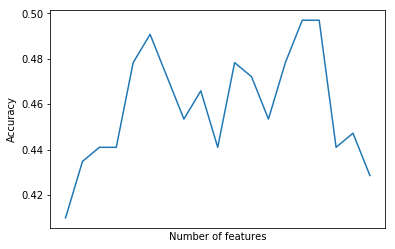

In [15]:
plt.plot(accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.xticks([])
plt.show()

Now that we have a value for k that gets us result for validation data, we can use it to finally test our model on testing data.

<h2>Part 3: Testing</h2>

In [16]:
X_new = SelectKBest(chi2, k = best_accuracy_loc * 5).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
ensemble(X_train, X_test, y_train, y_test)
# Produces a test accuracy of >45%, which is better than the model with an untuned value of k

0.48756218905472637